Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('default')
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Step 2: Reading data

In [2]:
df = pd.read_csv("D:\\PROGRAMMING\\Datasets\\A\\3\\bottle.csv", dtype={'47':int, '73':str})
df_binary = df[['Salnty', 'T_degC']]

df_binary.columns = ['Sal', 'Temp']

df_binary.head()

C:\Users\WIZTEC~1\AppData\Local\Temp/ipykernel_5216/419501424.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\\PROGRAMMING\\Datasets\\A\\3\\bottle.csv", dtype={'47':int, '73':str})


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


Step 3: Exploring the data Scatter

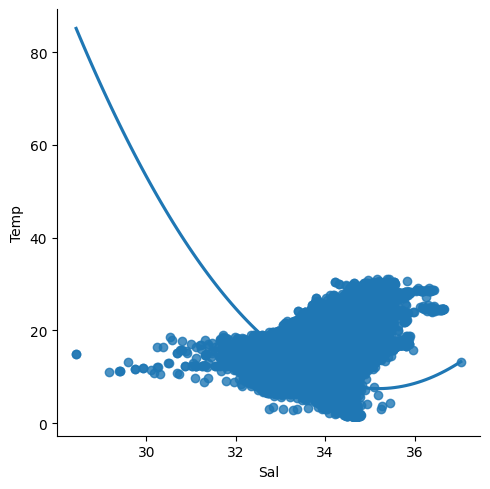

In [3]:
sb.lmplot(x = "Sal", y = "Temp", data=df_binary, order=2, ci=None)
plt.show()
#It creates plot with quadratic regression line with no confidence interval

Step 4: Data Cleansing

In [4]:
df_binary.fillna(method='ffill', inplace=True)

## .fillna(method="fill") is used to fill the missing values. The missing values will be replaced
## with a value from the previous row

## inplace = True means the changes will be applied directly to the df_binary dataframe without
## Creating the new dataframe

C:\Users\WIZTEC~1\AppData\Local\Temp/ipykernel_5216/3845931875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method='ffill', inplace=True)


Step 5: Training Our Model

In [5]:
## Separating the data into dependent and independent variables
## Converting each dataframe into the numpy array

X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)

## Drop any row with missing value
df_binary = df_binary.dropna().copy()


## Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

model = LinearRegression() 

model.fit(X_train, y_train) # The fit() method trains the model by finding the best coefficients 
                            # that minimize the sum of squared residuals between the predicted and 
                            # actual values.

print(model.score(X_test, y_test))  #The score() method of the LinearRegression model calculates 
                                    # the R-squared value, which represents the proportion of the 
                                    # variance in the dependent variable that can be explained by 
                                    # the independent variable
y_pred = model.predict(X_test)

0.2065480438911289


In [6]:
show1 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
show1

,Actual,Predicted
0,8.940,10.185570
1,5.920,8.399876
2,14.216,12.735507
3,5.530,9.173950
4,6.903,9.972188
...,...,...
216211,17.060,12.540556
216212,5.030,11.021078
216213,5.830,8.891351
216214,9.400,10.283865


Step 6: Exploring Or Result

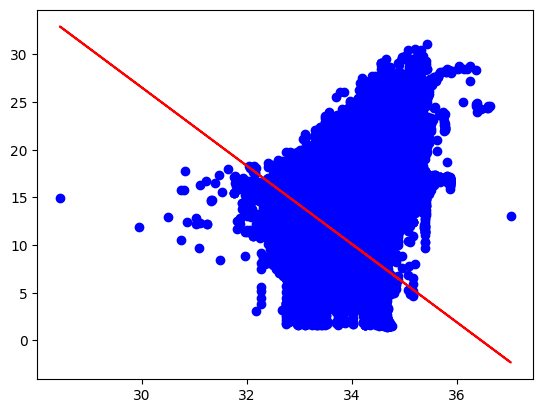

In [7]:
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, y_pred, color = 'r')
plt.show()

In [8]:
'''
The low accuracy score of our model suggest that our regressive model has no fit very vell with 
the existing data. This suggest that our data is not suitable for linear regression. But sometime
dataset may accept the linear regressor for the smaller dataset.
'''

'\nThe low accuracy score of our model suggest that our regressive model has no fit very vell with \nthe existing data. This suggest that our data is not suitable for linear regression. But sometime\ndataset may accept the linear regressor for the smaller dataset.\n'

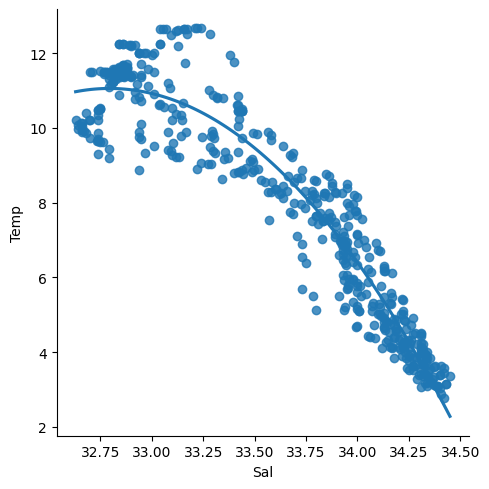

In [9]:
df_binary500 = df_binary[:][:500]       ## all columns with 500 rows

sb.lmplot(x = "Sal", y="Temp", data=df_binary500, order=2, ci=None)
plt.show()

In [10]:
df_binary500.fillna(method="ffill", inplace=True)

In [11]:
X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)

df_binary500.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression()

model.fit(X_train, y_train)
r_square = model.score(X_test, y_test)
print(r_square)

0.8290950374081342


In [12]:
y_pred = model.predict(X_test)
difference = y_test-y_pred
sum_of_difference = difference.sum()
print(sum_of_difference)

## For cost function

squared_diff = (y_test - y_pred)**2
sum_of_sd = squared_diff.sum()

mse = sum_of_sd/len(y_test)
print("The mean square difference(mse) is: ", mse)


-13.283424857280448
The mean square difference(mse) is:  1.3053685888299527


In [13]:
'''
The mse value "1.1320503802082293" indicates that on average the squared difference between the
predicted and actual values is relatively small resulting in the good fit for the 
model's predictions and actual vlaue
'''

'\nThe mse value "1.1320503802082293" indicates that on average the squared difference between the\npredicted and actual values is relatively small resulting in the good fit for the \nmodel\'s predictions and actual vlaue\n'

In [14]:
show2 = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
show2.loc[:, "difference"] = show2["Actual"] - show2["Predicted"]
show2

,Actual,Predicted,difference
0,3.62,4.207605,-0.587605
1,5.11,4.974987,0.135013
2,3.10,4.129895,-1.029895
3,10.88,11.662870,-0.782870
4,9.27,10.414660,-1.144660
...,...,...,...
120,8.19,6.116347,2.073653
121,9.29,12.163126,-2.873126
122,6.93,6.402901,0.527099
123,11.66,11.580304,0.079696


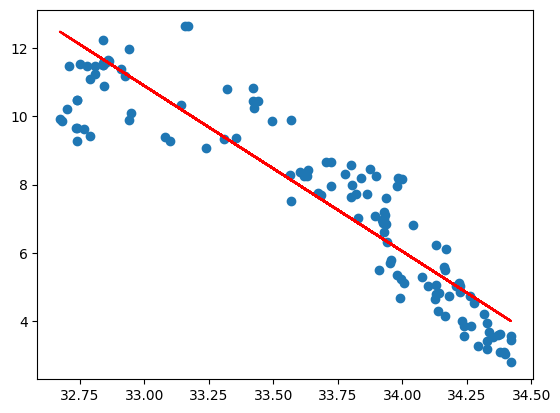

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = "r")
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared = False)

print("mean absolute error is : ", mae) #difference between the actual and predicted values.
print("mean squared error is  : ", mse)
print("root mean sq. error is : ", rmse)

mean absolute error is :  0.9091243815874803
mean squared error is  :  1.3053685888299527
root mean sq. error is :  1.1425272814379326
